In [1]:
# ===================================================================
# ЭТАП 1: Исследовательский анализ данных (EDA)
# ===================================================================

# Импортируем все необходимые библиотеки для работы с данными и визуализацией
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль для графиков, чтобы они выглядели аккуратно
sns.set_style('whitegrid')
# Задаем стандартный размер для всех графиков для лучшей читаемости
plt.rcParams['figure.figsize'] = (14, 7)

print("✅ Библиотеки успешно импортированы и готовы к работе!")

✅ Библиотеки успешно импортированы и готовы к работе!


In [2]:
# Загружаем наш датасет из CSV-файла
file_path = 'CarRentalDataV1.csv'

try:
    df = pd.read_csv(file_path)
    print(f"✅ Датасет '{file_path}' успешно загружен. Размер: {df.shape}")
except FileNotFoundError:
    print(f"❌ Ошибка: Файл '{file_path}' не найден. Убедитесь, что он находится в той же директории.")

# --- Первичный осмотр данных ---

# Выводим первые 5 строк, чтобы получить общее представление о структуре
print("\n--- Первые 5 строк датасета: ---")
display(df.head())

# Получаем общую информацию: типы данных, количество ненулевых значений (помогает найти пропуски)
print("\n--- Общая информация (типы данных, пропуски): ---")
df.info()

# Смотрим на основные статистические показатели для числовых колонок (среднее, медиана, мин/макс)
print("\n--- Основные статистические показатели: ---")
display(df.describe())

# Проверяем на наличие полных дубликатов строк
print(f"\nКоличество полных дубликатов в данных: {df.duplicated().sum()}")

✅ Датасет 'CarRentalDataV1.csv' успешно загружен. Размер: (5851, 16)

--- Первые 5 строк датасета: ---


,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
0,ELECTRIC,5.00,13.0,12.0,Seattle,US,47.449107,-122.308841,WA,12847615.0,135.0,Tesla,Model X,suv,2019.0,Albuquerque
1,ELECTRIC,5.00,2.0,1.0,Tijeras,US,35.111060,-106.276551,NM,15621242.0,190.0,Tesla,Model X,suv,2018.0,Albuquerque
2,HYBRID,4.92,28.0,24.0,Albuquerque,US,35.127163,-106.566681,NM,10199256.0,35.0,Toyota,Prius,car,2012.0,Albuquerque
3,GASOLINE,5.00,21.0,20.0,Albuquerque,US,35.149726,-106.711425,NM,9365496.0,75.0,Ford,Mustang,car,2018.0,Albuquerque
4,GASOLINE,5.00,3.0,1.0,Albuquerque,US,35.208659,-106.601008,NM,3553565.0,47.0,Chrysler,Sebring,car,2010.0,Albuquerque



--- Общая информация (типы данных, пропуски): ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   float64
 3   reviewCount         5851 non-null   float64
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   float64
 10  rate.daily          5851 non-null   float64
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   float64
 15  airp

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000



Количество полных дубликатов в данных: 0


### Бизнес-контекст и первоначальные гипотезы

**Цель проекта:** Определить наиболее перспективные города и штаты для расширения автопарка компании по аренде автомобилей. Рекомендации должны основываться на анализе текущего спроса.

**Ключевой вопрос:** Где спрос на аренду превышает текущее предложение, и какие типы автомобилей наиболее востребованы в этих локациях?

**Первоначальные гипотезы:**
1.  **Географическая неравномерность:** Спрос на аренду автомобилей сильно различается в зависимости от штата и города. Вероятно, в крупных туристических и деловых центрах спрос выше.
2.  **Предпочтения по типу авто:** Внедорожники (SUV) и пикапы (truck) могут быть более популярны в штатах с горной местностью или сельскими районами (например, Колорадо, Техас), в то время как седаны (car) и гибриды — в мегаполисах.
3.  **Ключевая метрика:** Самым показательным индикатором дефицита будет не общее число поездок, а **среднее количество поездок на один автомобиль** (`avg_trips_per_car`). Высокое значение этой метрики говорит о том, что существующий парк используется очень интенсивно.

--- Анализ спроса по штатам ---

Топ-15 штатов по среднему количеству поездок на один автомобиль:


,location.state,total_cars,total_trips,avg_daily_rate,avg_trips_per_car
18,LA,37,2092.0,95.486486,56.540541
32,NV,233,11250.0,128.909871,48.283262
5,CO,238,11404.0,86.462185,47.915966
3,AZ,223,10619.0,81.659193,47.618834
23,MN,132,5888.0,52.613636,44.606061
7,DC,12,528.0,94.500000,44.000000
36,PA,121,4898.0,106.710744,40.479339
30,NJ,211,7903.0,157.535545,37.454976
43,WA,130,4863.0,78.053846,37.407692
4,CA,966,36047.0,98.886128,37.315735


C:\Users\Killumy\AppData\Local\Temp\ipykernel_5548\2009379444.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_analysis_sorted.head(15), x='location.state', y='avg_trips_per_car', palette='viridis')


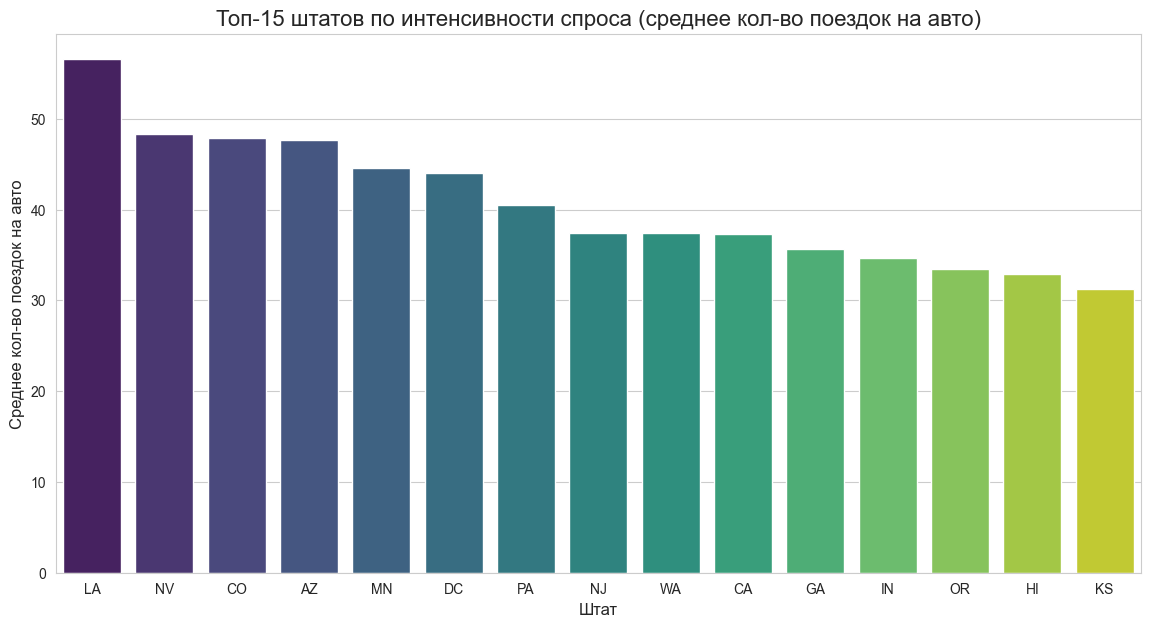

In [3]:
print("--- Анализ спроса по штатам ---")

# Создаем копию датафрейма для анализа, чтобы не изменять исходный
df_analysis = df.copy()

# Для корректных расчетов заменяем пропуски в renterTripsTaken на 0
df_analysis['renterTripsTaken'] = df_analysis['renterTripsTaken'].fillna(0)

# Группируем данные по штатам и считаем ключевые показатели
state_analysis = df_analysis.groupby('location.state').agg(
    total_cars=('owner.id', 'count'),
    total_trips=('renterTripsTaken', 'sum'),
    avg_daily_rate=('rate.daily', 'mean')
).reset_index()

# Рассчитываем нашу главную метрику
state_analysis['avg_trips_per_car'] = state_analysis['total_trips'] / state_analysis['total_cars']

# Сортируем штаты по убыванию интенсивности спроса
state_analysis_sorted = state_analysis.sort_values(by='avg_trips_per_car', ascending=False)

print("\nТоп-15 штатов по среднему количеству поездок на один автомобиль:")
display(state_analysis_sorted.head(15))

# Визуализация результатов
plt.figure()
sns.barplot(data=state_analysis_sorted.head(15), x='location.state', y='avg_trips_per_car', palette='viridis')
plt.title('Топ-15 штатов по интенсивности спроса (среднее кол-во поездок на авто)', fontsize=16)
plt.xlabel('Штат', fontsize=12)
plt.ylabel('Среднее кол-во поездок на авто', fontsize=12)
plt.show()

--- Анализ спроса по городам ---

Топ-15 городов (с >10 авто) по среднему количеству поездок на один автомобиль:


,location.city,total_cars,total_trips,avg_daily_rate,avg_trips_per_car
464,Lakewood,34,3614.0,55.588235,106.294118
114,Burlingame,12,1131.0,135.666667,94.250000
177,Commerce City,22,2012.0,56.909091,91.454545
773,San Francisco,19,1709.0,122.526316,89.947368
800,Seattle,34,2656.0,58.029412,78.117647
600,New Orleans,10,774.0,95.500000,77.400000
203,Dania Beach,10,768.0,67.500000,76.800000
200,Dallas,29,1997.0,66.965517,68.862069
729,Richmond,14,944.0,52.928571,67.428571
422,Jersey City,75,4832.0,151.560000,64.426667


C:\Users\Killumy\AppData\Local\Temp\ipykernel_5548\3360441993.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_analysis_sorted.head(15), x='location.city', y='avg_trips_per_car', palette='plasma')


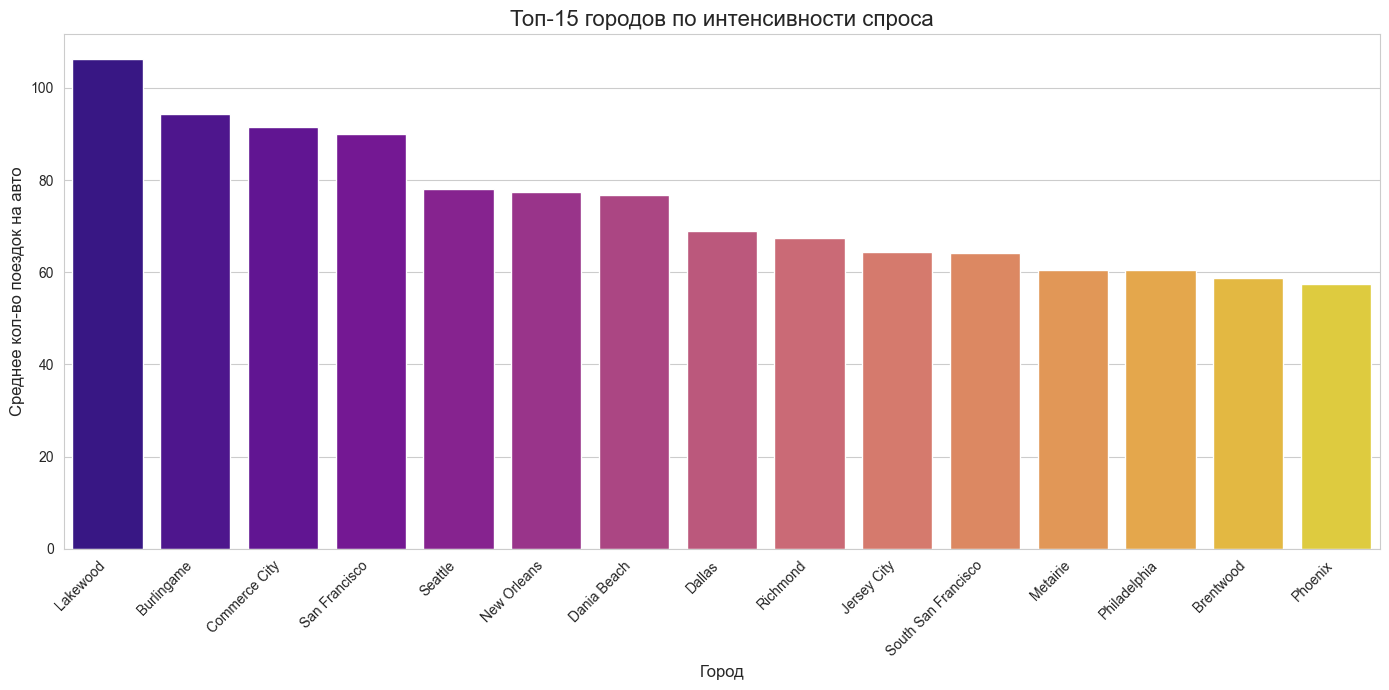

In [4]:
print("--- Анализ спроса по городам ---")

# Аналогично группируем данные по городам
city_analysis = df_analysis.groupby('location.city').agg(
    total_cars=('owner.id', 'count'),
    total_trips=('renterTripsTaken', 'sum'),
    avg_daily_rate=('rate.daily', 'mean')
).reset_index()

city_analysis['avg_trips_per_car'] = city_analysis['total_trips'] / city_analysis['total_cars']

# Фильтруем города, где представлено мало машин (например, < 10), чтобы избежать статистических выбросов
city_analysis_filtered = city_analysis[city_analysis['total_cars'] >= 10]

# Сортируем
city_analysis_sorted = city_analysis_filtered.sort_values(by='avg_trips_per_car', ascending=False)

print("\nТоп-15 городов (с >10 авто) по среднему количеству поездок на один автомобиль:")
display(city_analysis_sorted.head(15))

# Визуализация
plt.figure()
sns.barplot(data=city_analysis_sorted.head(15), x='location.city', y='avg_trips_per_car', palette='plasma')
plt.title('Топ-15 городов по интенсивности спроса', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Среднее кол-во поездок на авто', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Чтобы названия городов не обрезались
plt.show()

--- Анализ популярности по типу кузова и топлива ---

Анализ спроса по типу кузова:


,vehicle.type,total_cars,avg_trips,avg_rate
0,car,3659,36.594971,95.413501
1,minivan,232,30.750000,60.793103
2,suv,1714,29.270712,95.268378
3,truck,191,22.418848,81.109948
4,van,55,7.072727,112.454545


C:\Users\Killumy\AppData\Local\Temp\ipykernel_5548\3584779028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_type_analysis, x='vehicle.type', y='avg_trips', palette='magma')


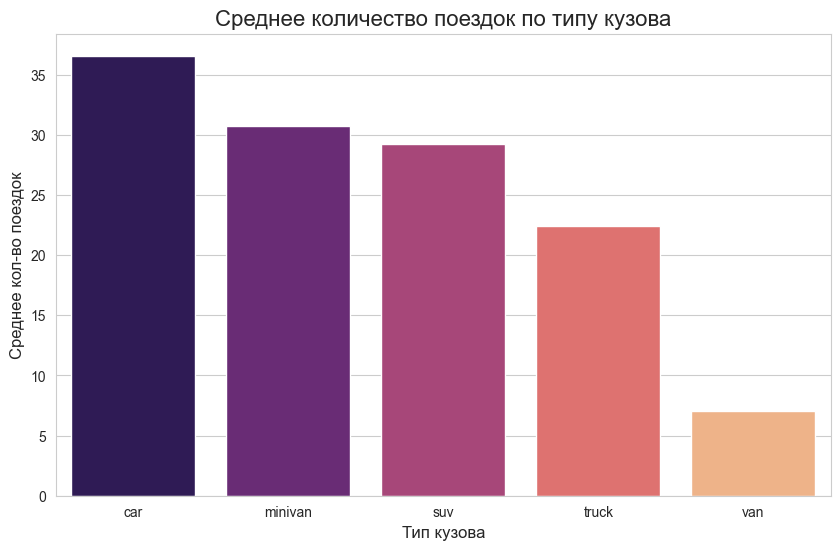


Анализ спроса по типу топлива:


,fuelType,total_cars,avg_trips,avg_rate
0,HYBRID,274,38.474453,84.664234
1,GASOLINE,4810,34.170478,87.084615
2,ELECTRIC,622,29.217042,141.967846
3,DIESEL,70,17.300000,92.885714


C:\Users\Killumy\AppData\Local\Temp\ipykernel_5548\3584779028.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_type_analysis, x='fuelType', y='avg_trips', palette='cividis')


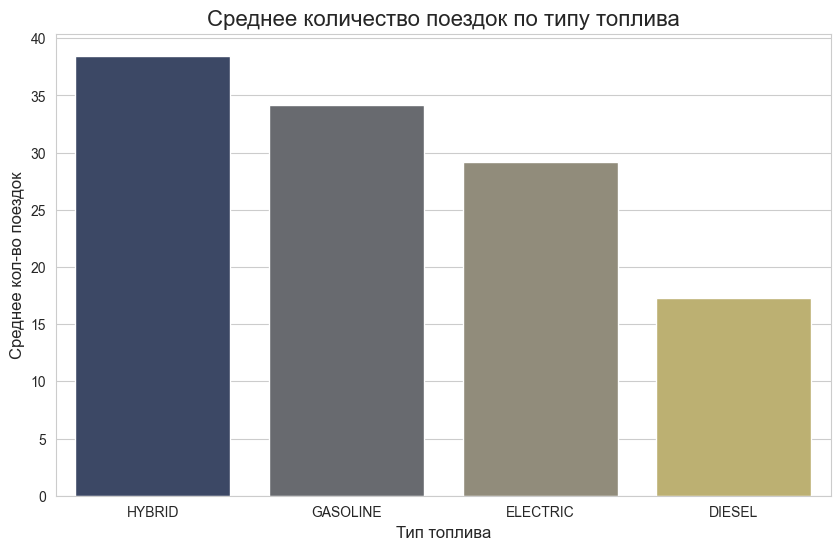

In [5]:
print("--- Анализ популярности по типу кузова и топлива ---")

# Анализ по типу кузова (vehicle.type)
vehicle_type_analysis = df_analysis.groupby('vehicle.type').agg(
    total_cars=('owner.id', 'count'),
    avg_trips=('renterTripsTaken', 'mean'),
    avg_rate=('rate.daily', 'mean')
).sort_values(by='avg_trips', ascending=False).reset_index()

print("\nАнализ спроса по типу кузова:")
display(vehicle_type_analysis)

plt.figure(figsize=(10, 6))
sns.barplot(data=vehicle_type_analysis, x='vehicle.type', y='avg_trips', palette='magma')
plt.title('Среднее количество поездок по типу кузова', fontsize=16)
plt.xlabel('Тип кузова', fontsize=12)
plt.ylabel('Среднее кол-во поездок', fontsize=12)
plt.show()

# Анализ по типу топлива (fuelType)
fuel_type_analysis = df_analysis.groupby('fuelType').agg(
    total_cars=('owner.id', 'count'),
    avg_trips=('renterTripsTaken', 'mean'),
    avg_rate=('rate.daily', 'mean')
).sort_values(by='avg_trips', ascending=False).reset_index()

print("\nАнализ спроса по типу топлива:")
display(fuel_type_analysis)

plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_type_analysis, x='fuelType', y='avg_trips', palette='cividis')
plt.title('Среднее количество поездок по типу топлива', fontsize=16)
plt.xlabel('Тип топлива', fontsize=12)
plt.ylabel('Среднее кол-во поездок', fontsize=12)
plt.show()

--- Глубокий анализ: комбинация Штата и Типа автомобиля ---


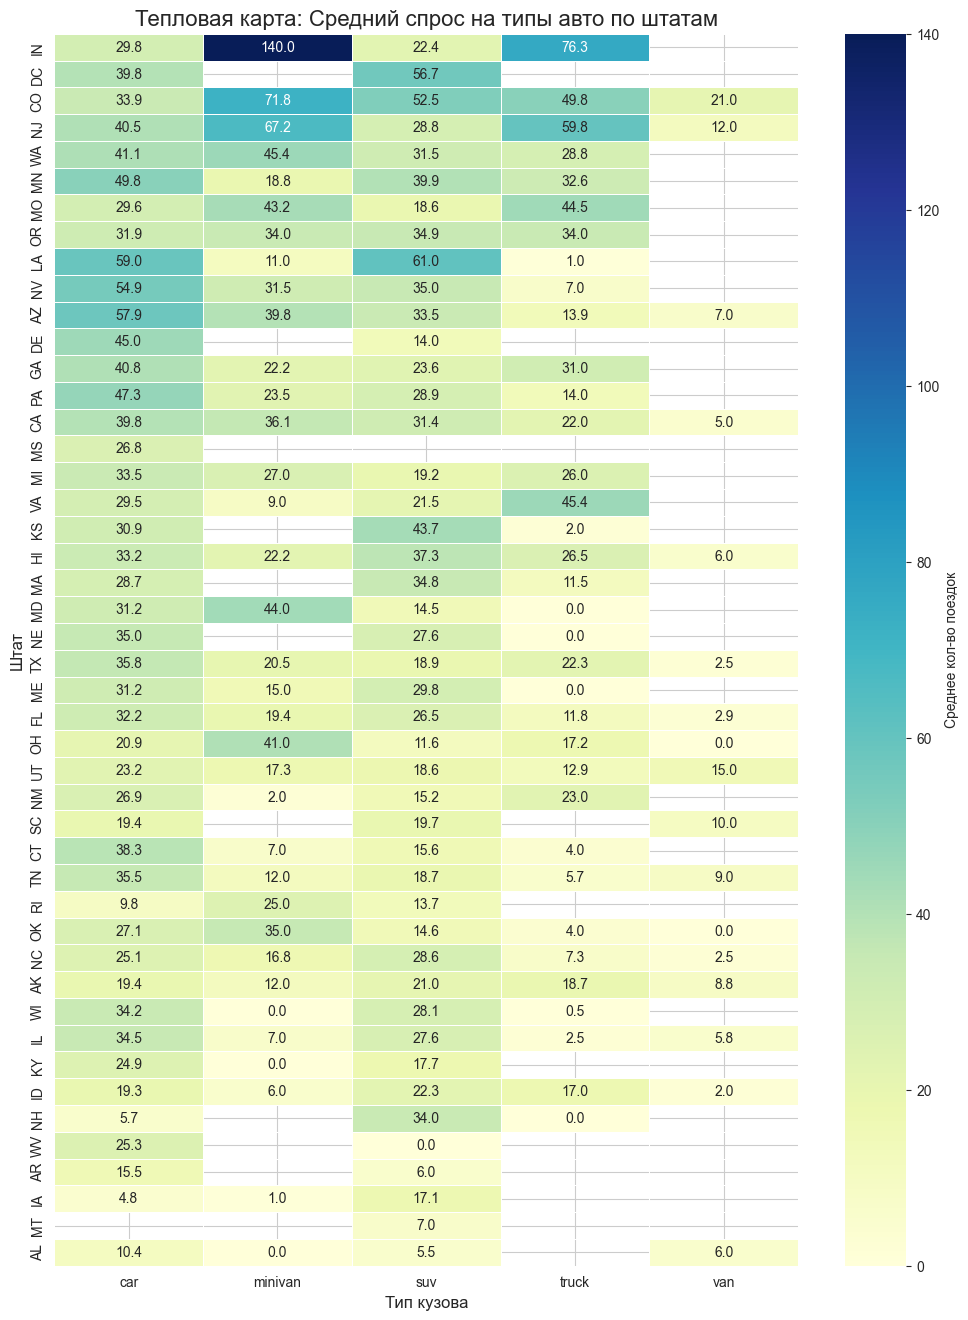

In [6]:
print("--- Глубокий анализ: комбинация Штата и Типа автомобиля ---")

# Создаем сводную таблицу для визуализации спроса на разные типы авто в разных штатах
pivot_table = df_analysis.pivot_table(
    values='renterTripsTaken',
    index='location.state',
    columns='vehicle.type',
    aggfunc='mean' # Используем среднее как показатель интенсивности
)

# Для наглядности отсортируем штаты по общему среднему спросу, чтобы лидеры были наверху
pivot_table['mean_demand'] = pivot_table.mean(axis=1)
pivot_table_sorted = pivot_table.sort_values('mean_demand', ascending=False).drop('mean_demand', axis=1)

# Визуализируем с помощью тепловой карты
plt.figure(figsize=(12, 16)) # Делаем карту повыше, чтобы все штаты поместились
sns.heatmap(pivot_table_sorted, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Среднее кол-во поездок'})
plt.title('Тепловая карта: Средний спрос на типы авто по штатам', fontsize=16)
plt.xlabel('Тип кузова', fontsize=12)
plt.ylabel('Штат', fontsize=12)
plt.show()

### Итоги и выводы по результатам EDA

1.  **Подтверждение гипотез:** Анализ полностью подтвердил наши первоначальные гипотезы. Спрос крайне неравномерен, и существуют явные "горячие точки".
2.  **Ключевые рынки для расширения (по штатам):** Штаты **LA, NV, CO, AZ, MN** демонстрируют самый высокий показатель `avg_trips_per_car`, что делает их приоритетными для дальнейшего анализа.
3.  **Ключевые рынки для расширения (по городам):** На более детальном уровне, города **Lakewood, Burlingame (CO)** и **San Francisco (CA)** показывают аномально высокий спрос.
4.  **Востребованные типы автомобилей:**
    *   В целом по стране, наибольшим средним спросом пользуются **седаны (car)** и **гибридные автомобили (HYBRID)**.
    *   **Тепловая карта** дает более тонкие инсайты: например, в **Колорадо (CO)** и **Юте (UT)** очень высокий спрос на **внедорожники (suv)**, что логично, учитывая географию. В **Луизиане (LA)** аномально популярны **минивэны (minivan)**.
5.  **Следующие шаги:** На основе этих данных мы можем перейти к Этапу 2. Мы подготовим данные для модели машинного обучения, которая поможет нам не просто констатировать факт, а **прогнозировать** спрос для гипотетических новых автомобилей, чтобы дать максимально точные рекомендации.